# Contenuti
- [Pandas](#Pandas)
    - [Pandas e Numpy](#Pandas-e-Numpy)
    - [Esercizio 1](#Esercizio-1)
- [Matplotlib](#Matplotlib)
    - [Plot](#Plot)
        - [Caratteristiche e ulteriori funzionalità](#Caratteristiche-e-ulteriori-funzionalità)
        - [Opzioni grafiche](#Opzioni-grafiche)
    - [Istogrammi](#Istogrammi)
    - [Esercizio 2](#Esercizio-2)
    - [Scatter plot](#Scatter-plot)
    - [Subplot](#Subplot)
    - [Esercizio 3](#Esercizio-3)

# Pandas

Un altro strumento che Python mette a disposizione per l'analisi dei dati è [Pandas](https://pandas.pydata.org/), che fornisce strutture di dati veloci e flessibili, soprattutto per l'analisi dei dati in tempo reale. Pandas riusa librerie esistenti che abbiamo già visto come Numpy. Prima di tutto importiamo *pandas* che, per convenzione, viene importato con il nome *pd*.


In [3]:
import pandas as pd

Pandas permette di importare in modo rapido i file in formato CSV, molto comuni per il Machine Learning. Potete scaricare entrambi i dataset che useremo in questa esercitazione da Microsfot Teams. Si tratta dei file **Columbus_Ed_astro_pi_datalog.csv** e **meteo.csv**. Il primo dataset che utilizzeremo è **Columbus_Ed_astro_pi_datalog.csv** contiene una collezione di dati registrati da una scheda elettronica RaspberryPi presente sulla Stazione Spaziale Internazionale, scaricati da qui:

[https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis](https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis)

Nel sito è possibile trovare la descrizione dettagliata dei dati raccolti dai sensori, nel mese di febbraio 2016 (un record ogni 10 secondi).

**Importiamo il file**

Il metodo ```read_csv``` di Pandas importa i dati da un file CSV e li memorizza in una struttura DataFrame. Tale metodo accetta differenti parametri opzionali. L'unico obbligarorio e il path del file da leggere (se il file si trova sulla stessa directory del notebook è sufficiente il nome del file). Si consiglia anche di specificare il tipo di encoding (tipicamente 'UTF-8') per evitare errori di lettura.

In [4]:
import pandas as pd   # importiamo pandas 
import numpy as np    # importiamo numpy

# ricordatevi l'encoding !
df = pd.read_csv('Columbus_Ed_astro_pi_datalog.csv', encoding='UTF-8') 
# consente di estrarre le informazioni primarie dal dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      110869 non-null  int64  
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
 19  ti

Possiamo vedere rapidamente righe e colonne del dataframe con l'attributo `shape`.

In [5]:
df.shape

(110869, 20)

Il metodo `head()` permette di visualizzare le prime righe del dataset, mentre il metodo tail() permette di visualizzare le ultime righe:

In [6]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20


In [7]:
df.tail()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50
110868,110869,31.57,27.51,24.83,42.94,1005.86,2.17,49.77,134.18,-17.885872,-27.824149,1.293345,-0.000787,0.017261,0.014380,0.000459,0.000076,0.000030,0,2016-02-29 09:25:00


Il metodo `describe` permette di estrarre in maniere rapida numerose statistiche utili per l'analsisi dei dati:

* il conteggio delle righe
* la media
* la deviazione standard
* i quartili
* minimo e massimo

In [8]:
df.describe()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
count,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.00000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,1.108690e+05,110869.000000,1.108690e+05,110869.000000
mean,55435.000000,32.236259,28.101773,25.543272,46.252005,1008.126788,2.770553,51.807973,200.90126,-19.465265,-1.174493,-6.004529,-0.000630,0.018504,0.014512,-8.959493e-07,0.000007,-9.671594e-07,0.000180
std,32005.267835,0.360289,0.369256,0.380877,1.907273,3.093485,21.848940,2.085821,84.47763,28.120202,15.655121,8.552481,0.000224,0.000604,0.000312,2.807614e-03,0.002456,2.133104e-03,0.060065
min,1.000000,31.410000,27.200000,24.530000,42.270000,1001.560000,0.000000,30.890000,0.01000,-73.046240,-43.810030,-41.163040,-0.025034,-0.005903,-0.022900,-3.037930e-01,-0.378412,-2.970800e-01,0.000000
25%,27718.000000,31.960000,27.840000,25.260000,45.230000,1006.090000,1.140000,51.180000,162.43000,-41.742792,-12.982321,-11.238430,-0.000697,0.018009,0.014349,-2.750000e-04,-0.000278,-1.200000e-04,0.000000
50%,55435.000000,32.280000,28.110000,25.570000,46.130000,1007.650000,1.450000,51.950000,190.58000,-21.339485,-1.350467,-5.764400,-0.000631,0.018620,0.014510,-3.000000e-06,-0.000004,-1.000000e-06,0.000000
75%,83152.000000,32.480000,28.360000,25.790000,46.880000,1010.270000,1.740000,52.450000,256.34000,7.299000,11.912456,-0.653705,-0.000567,0.018940,0.014673,2.710000e-04,0.000271,1.190000e-04,0.000000
max,110869.000000,33.700000,29.280000,26.810000,60.590000,1021.780000,360.000000,359.400000,359.98000,33.134748,37.552135,31.003047,0.018708,0.041012,0.029938,2.151470e-01,0.389499,2.698760e-01,20.000000


E' possibile indicizzare una singola colonna del dataframe, ad esempio per limitare `describe` ad una sola colonna come `humidity`, puoi scrivere così:

In [9]:
df['humidity'].describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

Possiamo anche indicizzare i singoli record del dataframe tramite numeri di riga. Per ottenere la i-esima serie si utilizza il metodo `iloc[i]`.

In [10]:
df.iloc[6]

ROW_ID                          7
temp_cpu                    31.68
temp_h                      27.53
temp_p                      25.01
humidity                    45.31
pressure                   1001.7
pitch                        0.63
roll                        53.55
yaw                         186.1
mag_x                  -50.447346
mag_y                   -7.937309
mag_z                  -12.188574
accel_x                  -0.00051
accel_y                  0.019264
accel_z                  0.014528
gyro_x                  -0.000111
gyro_y                    0.00032
gyro_z                   0.000222
reset                           0
time_stamp    2016-02-16 10:45:41
Name: 6, dtype: object

&Egrave; possibile selezionare un dataframe di posizioni contigue, utilizzando lo _slicing_, come abbiamo già fatto per [stringhe](https://it.softpython.org/strings/strings2-sol.html#Slice) e [liste](https://it.softpython.org/lists/lists2-sol.html#Slice).

Qua per esempio selezioniamo le righe dalla 5 _inclusa_ alla 7 _esclusa_ :

In [11]:
df.iloc[5:7]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41


La proprietà `colums` restituisce le intestazioni di colonna:

In [12]:
df.columns

Index(['ROW_ID', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw', 'mag_x', 'mag_y', 'mag_z', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'reset', 'time_stamp'],
      dtype='object')

**Nota**: Come si vede qua sopra, il tipo dell'oggetto restituito non è una lista, ma un contenitore speciale definito da pandas:

In [13]:
type(df.columns)

pandas.core.indexes.base.Index

Ciononostante, possiamo accedere agli elementi di questo contenitore usando indici dentro le parentesi quadre:

In [14]:
df.columns[0]

'ROW_ID'

In [15]:
df.columns[1]

'temp_cpu'

Il metodo `corr` permette di calcolare la correlazione tra le colonne del DataFrame, con valori da -1.0 a +1.0:

In [16]:
#seleziono una porzione del dataframe per ridurre la dimensione della matrice di correlazion
df2 = df[['ROW_ID', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw']]
df2.corr()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw
ROW_ID,1.000000,0.361391,0.435289,0.339916,-0.110241,0.243337,-0.007741,-0.390159,-0.034877
temp_cpu,0.361391,1.000000,0.986872,0.991672,-0.297081,0.038065,0.008076,-0.171644,-0.117972
temp_h,0.435289,0.986872,1.000000,0.993260,-0.281422,0.070882,0.005145,-0.199628,-0.117870
temp_p,0.339916,0.991672,0.993260,1.000000,-0.288373,0.035496,0.006750,-0.163685,-0.118463
humidity,-0.110241,-0.297081,-0.281422,-0.288373,1.000000,0.434374,0.004050,0.101304,0.031664
pressure,0.243337,0.038065,0.070882,0.035496,0.434374,1.000000,0.003018,0.011815,-0.051697
pitch,-0.007741,0.008076,0.005145,0.006750,0.004050,0.003018,1.000000,0.087941,-0.011611
roll,-0.390159,-0.171644,-0.199628,-0.163685,0.101304,0.011815,0.087941,1.000000,0.095354
yaw,-0.034877,-0.117972,-0.117870,-0.118463,0.031664,-0.051697,-0.011611,0.095354,1.000000


In [17]:
corr_df = df2.corr()
corr_df.style.background_gradient(cmap='coolwarm')

Matplotlib is building the font cache; this may take a moment.


,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw
ROW_ID,1.000000,0.361391,0.435289,0.339916,-0.110241,0.243337,-0.007741,-0.390159,-0.034877
temp_cpu,0.361391,1.000000,0.986872,0.991672,-0.297081,0.038065,0.008076,-0.171644,-0.117972
temp_h,0.435289,0.986872,1.000000,0.993260,-0.281422,0.070882,0.005145,-0.199628,-0.117870
temp_p,0.339916,0.991672,0.993260,1.000000,-0.288373,0.035496,0.006750,-0.163685,-0.118463
humidity,-0.110241,-0.297081,-0.281422,-0.288373,1.000000,0.434374,0.004050,0.101304,0.031664
pressure,0.243337,0.038065,0.070882,0.035496,0.434374,1.000000,0.003018,0.011815,-0.051697
pitch,-0.007741,0.008076,0.005145,0.006750,0.004050,0.003018,1.000000,0.087941,-0.011611
roll,-0.390159,-0.171644,-0.199628,-0.163685,0.101304,0.011815,0.087941,1.000000,0.095354
yaw,-0.034877,-0.117972,-0.117870,-0.118463,0.031664,-0.051697,-0.011611,0.095354,1.000000


# Pandas e Numpy

Ovviamente è possibile convertite un dataframe in un numpy array e viceversa. Nel primo caso è sufficiente utilizzare il metodo `to_numpy`  dell'oggetto dataframe. Nel secondo caso invece, dato che le matrici di numpy non sono delle vere e proprie tabelle, per convertirle in dataframe (con **pd.DataFrame**) è necessario specificare un ulteriore parametro relativo alle colonne del dataframe.

In [16]:
import numpy as np
import pandas as pd

#crea un numpy array bidimensionale
my_array = np.array([[11,22,33],[44,55,66]])

#converte il numpy array in un dataframe
df = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])

#converte il dataframe in un numpy array 
my_array2 = df.to_numpy()

print(df)
print(type(df))

print(my_array2)
print(type(my_array2))

   Column_A  Column_B  Column_C
0        11        22        33
1        44        55        66
<class 'pandas.core.frame.DataFrame'>
[[11 22 33]
 [44 55 66]]
<class 'numpy.ndarray'>


Potete consultare le ulteriori operazioni sui dataframe dalla [documentazione](https://pandas.pydata.org/docs/getting_started/tutorials.html)

### Esercizio 1

Create un nuovo dataframe ```meteo``` importando i dati dal file [meteo.csv](meteo.csv), che contiene i dati meteo di Trento di novembre 2017 (fonte: https://www.meteotrentino.it). Visualizza le informazioni relative a questo Dataframe per trovare:

* i valori di pressione media, minima e massima
* la temperatura media
* le date delle giornate di pioggia

In [79]:
#Scrivi qui la soluzione
dfm = pd.read_csv('meteo.csv', encoding='UTF-8') 
# consente di estrarre le informazioni primarie dal dataframe
print()
print(dfm['Pressione'].describe()[['mean','min','max']])
print()
print(dfm['Temp'].describe()[['mean']])
print()
dfm_dp = dfm[['Data','Pioggia']]
dfm_dp_fil = dfm_dp.query('Pioggia>=1')['Data']
print(dfm_dp_fil)


mean    986.340827
min     966.300000
max     998.300000
Name: Pressione, dtype: float64

mean    6.410702
Name: Temp, dtype: float64

470     05/11/2017 21:30
471     05/11/2017 21:45
1144    12/11/2017 22:15
1147    12/11/2017 23:00
1148    12/11/2017 23:15
1149    12/11/2017 23:30
Name: Data, dtype: object


# Matplotlib
**Matplotlib** è una delle librerie più conosciute per Python per la creazione e la visualizzazione di grafici.

Matplotlib mette a disposizione numerosi strumenti. L'obiettivo dell'esercitazione odierna è presentarne le principali caratteristiche. Per approfondire le conoscenze su questa libreria potete fare riferimento alla [relativa documentazione](https://matplotlib.org/api/api_overview.html).

In questo caso non importiamo l'intero modulo *matplotlib** ma importiamo **pyplot**, sotto-modulo di **matplotlib**. In questo caso, per convenzione, attribiuamo il nome *plt* al modulo *matplotlib.pyplot*. Tale nome potrà essere utilizzato successivamente tutte le volte che si vorrà fare riferimento al modulo *matplotlib.pyplot*.

In [80]:
import matplotlib.pyplot as plt

#con questo comando speciale per IPython permettiamo di inserire i plot inline
%matplotlib inline  

## Plot
La cella seguente riporta un esempio per la visualizzazione di un semplice grafico utilizzando Matplotlib. Notate come il risultato sia stato visualizzato direttamente nel notebook. La libreria è ovviamente utilizzabile anche al di fuori del notebook: in tal caso verrà creata un'apposita interfaccia grafica.

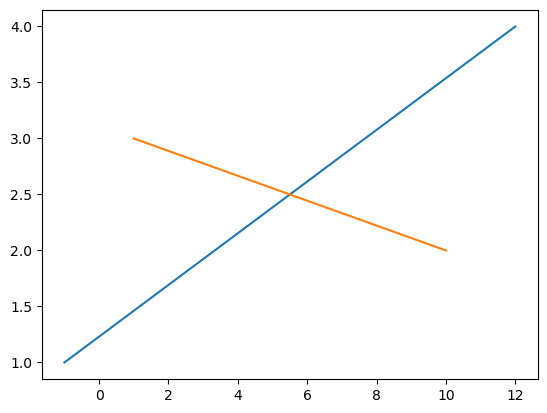

In [81]:
x1, y1 = [-1, 12], [1, 4]
x2, y2 = [1, 10], [3, 2]
plt.plot(x1, y1, x2, y2)
plt.show()

La funzione **plot(...)** crea un grafico contenente punti e segmenti. Da notare il formato dei parametri: *x1* contiene le ascisse dei punti che formano il primo segmento, *y1* ne contiene le ordinate. Lo stesso vale per il secondo segmento (*x2* e *y2*).

## Caratteristiche e ulteriori funzionalità
Il modulo appena importato mantiene internamente un riferimento alla vista che stiamo costruendo. Non è quindi necessario memorizzare l'istanza della vista in una variabile. In questa maniera possiamo comunque creare viste articolate o anche più di una in sequenza, come accade nell'esempio seguente:

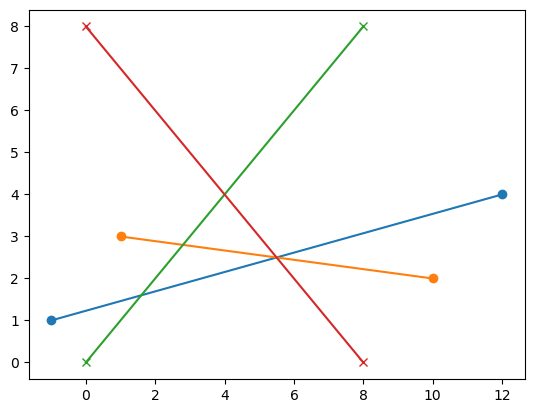

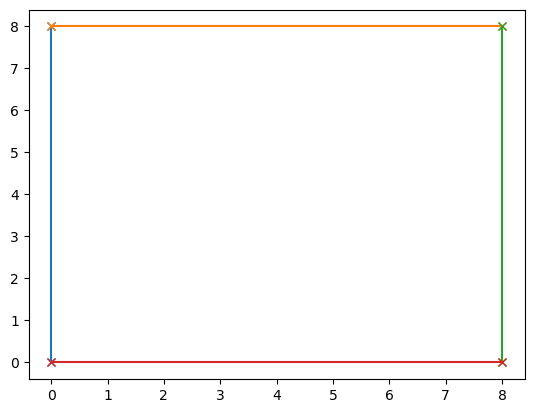

In [82]:
# Aggiungiamo segmenti attraverso più chiamate alla funzione plot(...)
x1, y1 = [-1, 12], [1, 4]
x2, y2 = [1, 10], [3, 2]
plt.plot(x1, y1, x2, y2, marker = 'o')

x1, y1 = [0, 8], [0, 8]
x2, y2 = [0, 8], [8, 0]
plt.plot(x1, y1, x2, y2, marker = 'x')
plt.show()

# Creiamo un nuovo grafico con 4 segmenti, tutti inseriti con un'unica chiamata a plot(...)
x1, y1 = [0, 0], [0, 8]
x2, y2 = [0, 8], [8, 8]
x3, y3 = [8, 8], [8, 0]
x4, y4 = [8, 0], [0, 0]
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4, marker = 'x')
plt.show()

Come avete appena visto la funzione **show(...)** si occupa di creare l'immagine finale ripulendo allo stesso tempo lo stato interno mantenuto dal modulo. Chiamate successive permettono di creare ulteriori viste.

## Opzioni grafiche

Avrete anche notato che plot accetta un numero arbitrario di parametri senza nome. Questo ci permette di aggiungere un numero imprecisato di segmenti in un'unica chiamata.

In Matplolib è comune trovare funzioni che accettano un numero potenzialmente infinito di *parametri geometrici* e che lasciano ai *parametri con nome* il compito di curarne la presentazione grafica.

Come ad esempio nella cella seguente:

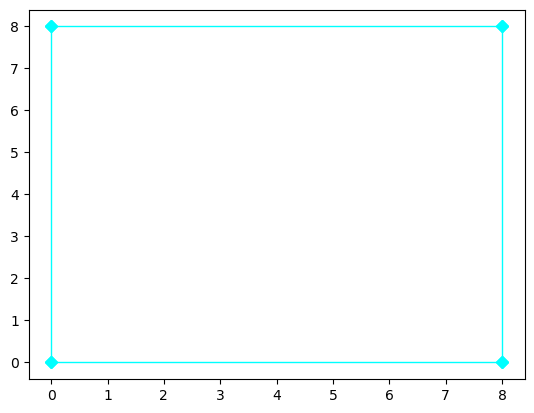

In [83]:
x1, y1 = [0, 0], [0, 8]
x2, y2 = [0, 8], [8, 8]
x3, y3 = [8, 8], [8, 0]
x4, y4 = [8, 0], [0, 0]
# Plot(...) mette a disposizione molte opzioni per controllare la grafica degli elementi
# In questo esempio usiamo linewidth, color e marker
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4, linewidth = 1, color = (0.0, 1.0, 1.0), marker = 'D')
plt.show()

*xi* e *yi* non hanno dimensioni fisse, il che consente di rappresentare qualsiasi funzione (lineare e non), inoltre con qualche ulteriore funzione è possibile aggiungere label degli assi, titolo e leggenda

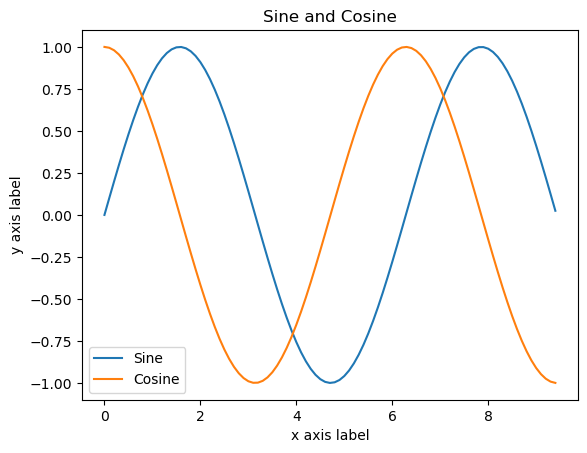

In [84]:
import numpy as np
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

## Istogrammi
Tramite Matplotlib è possibile costruire una grande varietà di viste. Quello che segue è un esempio di istogramma.

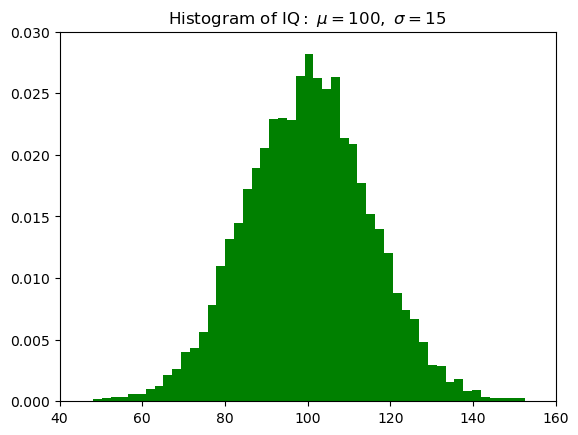

In [85]:
# La libreria random permette di generare numeri casuali
import random
        
# Genera una lista di 10000 numeri presi da una distribuzione gaussiana
mu, sigma = 100, 15
x = [random.gauss(mu, sigma) for _ in range(10000)]

# La funzione utilizzata per mostrare istogrammi è hist(...)
plt.hist(x, bins=50, density=True, facecolor='green')

# Modifica di qualche opzione graficab
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])

plt.show()

Altri dettagli sulla funzione `plot` li trovate nella [documentazione](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.plot.html).

### Esercizio 2

Utilizzando il dataframe contenenti i dati meteo (dal file *meteo.csv*) mettere in grafico 
- l'andamento delle temperature 
- la pressione 
- l'ammontare di pioggia

Infine calcolare e mostrare nel plot la temperatura media giornaliera per ciascun giorno, e mostrala nel plot, così da avere una coppia di nuove colonne come queste:

```
    Giorno      Temp_media_giorno
01/11/2017      7.983333
01/11/2017      7.983333
01/11/2017      7.983333
    .               .
    .               .
02/11/2017      7.384375
02/11/2017      7.384375
02/11/2017      7.384375
    .               .
    .               .
```


**SUGGERIMENTO 1**: per i grafici di dati collezionati in un dataframe è possibile usare il metodo **plot()** di pandas, che di default utilizza matplotlib

**SUGGERIMENTO 2**: aggiungi la colonna `'Giorno'` estraendo solo il giorno dalla data. Per farlo usa la funzione `.str` applicata a tutta la colonna.

**SUGGERIMENTO 3**: Ci sono vari modi per risolvere il problema: 

- il più efficiente ed elegante è con l'operatore `groupby`, vedere [Pandas trasform - more than meets the eye](https://towardsdatascience.com/pandas-transform-more-than-meets-the-eye-928542b40b56)
- Come alternative, potresti usare un `for` per ciclare i giorni. Tipicamente usare un `for` non è una buona idea con Pandas, perchè con dataset larghi ci può voler molto ad eseguire gli aggiornamenti. Comunque, dato che questo dataset è piccolo a sufficienza, puoi provare ad usare un `for` per ciclare sui giorni e dovresti ottenere i risultati in un tempo ragionevole

          Data  Temp Media
0   01/11/2017    7.983333
1   01/12/2017   -0.300000
2   02/11/2017    7.384375
3   03/11/2017    9.330208
4   04/11/2017    8.343750
5   05/11/2017    8.463542
6   06/11/2017    8.627083
7   07/11/2017    8.241053
8   08/11/2017    8.170833
9   09/11/2017    8.739583
10  10/11/2017    7.491667
11  11/11/2017    6.210417
12  12/11/2017    7.519792
13  13/11/2017    7.971875
14  14/11/2017    9.142105
15  15/11/2017    5.886458
16  16/11/2017    7.044211
17  17/11/2017    6.550000
18  18/11/2017    5.835417
19  19/11/2017    5.871875
20  20/11/2017    5.252083
21  21/11/2017    4.342708
22  22/11/2017    5.033333
23  23/11/2017    5.801042
24  24/11/2017    5.381250
25  25/11/2017    5.219792
26  26/11/2017    7.446875
27  27/11/2017    3.398958
28  28/11/2017    0.793750
29  29/11/2017    1.423958
30  30/11/2017    3.543750


<AxesSubplot:>

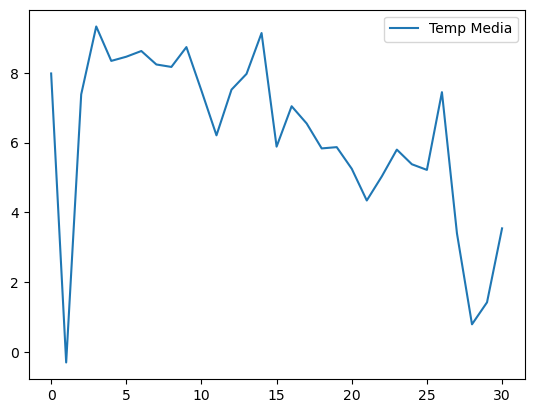

In [97]:
# Completa qui l'esercizio 2
# ...
df2 = dfm
df2['Data'] = dfm['Data'].apply(lambda s: s[0:10])
df2 = df2.groupby('Data')['Temp'].\
aggregate('mean').rename("Temp Media").reset_index()
print(df2)
df2.plot()

## Scatter plot
E' possibile creare uno scatterplot 2D utilizzando la funzione `scatter` per la quale trovate i dettagli nella [documentazione](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.scatter.html).

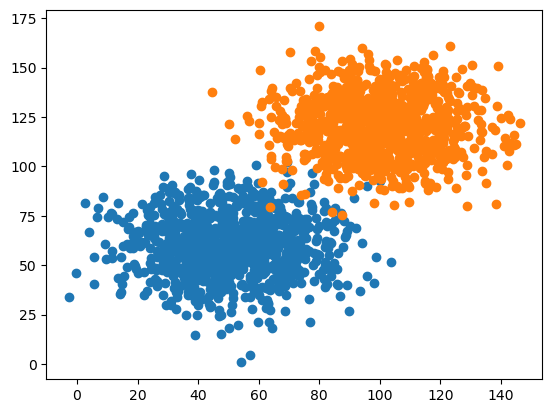

In [98]:
#un esempio di scatterplot 2D
import matplotlib.pyplot as plt
import random
        
x1 = [random.gauss(50, 17) for _ in range(1000)]
y1 = [random.gauss(60, 15) for _ in range(1000)]

x2 = [random.gauss(100, 17) for _ in range(1000)]
y2 = [random.gauss(120, 15) for _ in range(1000)]

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

## Boxplot

E' possibile creare uno boxplot utilizzando la funzione `boxplot` per la quale trovate i dettagli nella [documentazione](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.boxplot.html).

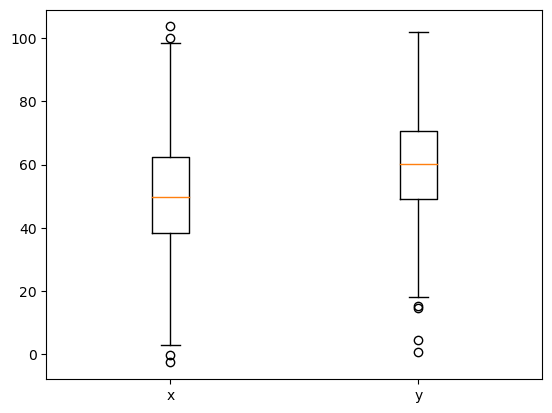

In [99]:
plt.boxplot([x1,y1], labels = ["x", "y"])
plt.show()

## Subplot
È possibile fare il plot di diversi elementi nella stessa figura utilizzando la funzione `subplot`

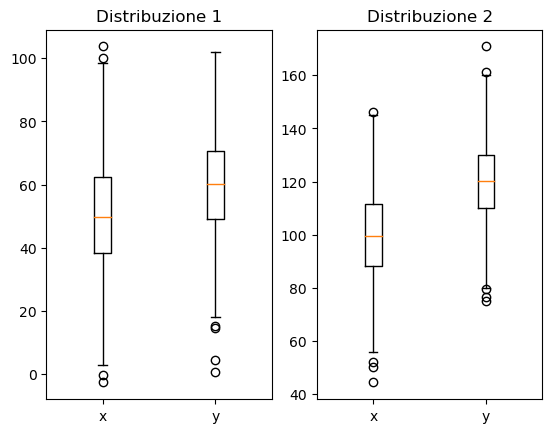

In [100]:
# Set up a subplot grid that has height 1 and width 2,
# and set the first such subplot as active.
plt.subplot(1, 2, 1)
# Make the first plot
plt.boxplot([x1, y1], labels = ["x", "y"])
plt.title('Distribuzione 1')

# Set the second subplot as active, and make the second plot.
plt.subplot(1, 2, 2)
# Make the second plot
plt.boxplot([x2, y2], labels = ["x", "y"])
plt.title('Distribuzione 2')

# Show the figure.
plt.show()

Potete leggere ulteriori dettagli sulla funziona `subplot` nella [documentazione](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.subplot.html).

# Esercizio 3 
Utilizzando la soluzione dell'esercitazione precedente (esercizio 3) definire due dataset composti da due classi e 10000 record con distribuzione uniforme e Gaussiana. Per ogni dataset calcolare le informazioni statistiche e infine fare il plot dell'istogramma nella stessa figura (due plot separati) e annotare graficamente il valore medio dell'intero dataset e i valori medi per le singole classi.

### Suggerimenti
Le opzioni grafiche della funzione sono contenute nella sezione riguardante i **\*\*kwargs**, contenuta tra gli *Other Parameters*. Per l'Annotazione' dovrete cercare altre funzioni nella [documentazione completa](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

In [ ]:
# Completa qui l'esercizio 3
# ...